In [207]:
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from PIL import Image
from os import listdir
from os.path import join
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [106]:
people = ('mat', 'ada', 'ania')
photos_dir = 'photos/'
edited_dir = 'edited_photos/'
pure_data = 'photo_pure_data/'

In [168]:
basewidth = 300
baseheight = 450
photo_amount = 45

In [111]:
def prepare_photo(img: Image, img_name:str, output_dir: str):
    """Resize and turn photo to gray scale"""
    basewidth = 300
    baseheight = 450
#     wpercent = (basewidth / float(img.size[0]))
#     hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, baseheight), PIL.Image.ANTIALIAS)
    img = img.convert('L')
    img.save(join(output_dir, img_name))

#### Resize and turn photo to gray scale

In [113]:
for person_dir in people:
    for photo_name in listdir(join(photos_dir, person_dir)):
        photo = Image.open(join(photos_dir, person_dir, photo_name))
        prepare_photo(photo, photo_name, join(edited_dir, person_dir))

In [114]:
def image_to_csv(image: Image, dest_path: str, label: int):
    width, height = image.size
    dest_path = dest_path + '.csv'
    
    with open(dest_path, 'w') as dest_file:
        for y in range(0, height):
            for x in range(0, width):
                dest_file.write(f'{image.getpixel((x,y))};{label}\n')

#### Put data to csv

In [115]:
for label, person_dir in enumerate(people): 
    for photo_name in listdir(join(edited_dir, person_dir)):
        file_name = photo_name.split('.')[0]
        image = Image.open(join(edited_dir, person_dir, photo_name))
        image_to_csv(image, join(pure_data, person_dir, file_name), label + 1)

In [116]:
def read_dataset_from_csv(dataset):
    dataset_df = pd.read_csv(dataset, sep=';')
    X = dataset_df.iloc[:, 0]
    y = dataset_df.iloc[:, -1]
    return X, y

def read_files(pure_data_path: str, people_path: tuple):
    files = [join(person_path, item) for person_path in people_path for item in listdir(join(pure_data_path, person_path)) ]
    x = np.empty(0)
    y = np.empty(0)

    for file in files:
        X, Y = read_dataset_from_csv(join(pure_data_path, file))
        X = np.array([X])
        
        if x.any():
            x = np.r_[x, X]
        else:
            x = X
        if y.any():
            y = np.r_[y, Y]
        else:
            y = Y
            
    return x, y

#### Avg face from 45 photos, 3 people

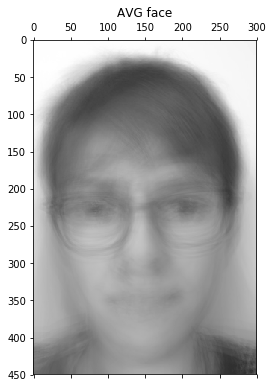

In [243]:
X, y = read_files(pure_data, people)

jump = baseheight * basewidth
y = y[:-1:jump]

mean_face = np.mean(X, axis = 0)
mean_face = np.r_[mean_face, [0]]
mean_face = mean_face.reshape(baseheight, basewidth)

plt.matshow(mean_face, cmap='gray')
plt.title("AVG face")
plt.show()

In [215]:
X_gpc = deepcopy(X)

X_gpc = np.c_[X_gpc, np.zeros((45))]
pca = PCA()
pca.fit(X_gpc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [216]:
def get_principal_components(X: np.ndarray, photo_amount: int, photo_size: tuple):
    fig = plt.figure(figsize=(10, 12)) 
    plt.title('Principal components visualization')
    plt.axis('off')
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
    
    for i in range(photo_amount): 
        ax = fig.add_subplot(5, 12, i+1) 
        ax.set_title(f'{i+1}')
        ax.matshow(X[i].reshape(photo_size), cmap='gray', interpolation='nearest') 
        ax.axis('off')
    plt.show()

#### explained variance ratio

Text(0,0.5,'principal components')

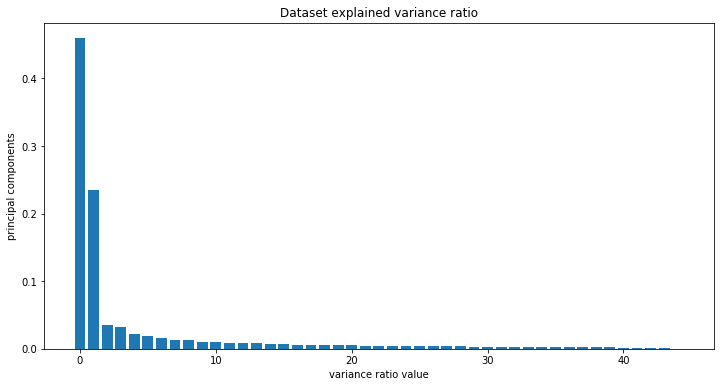

In [258]:
fig = plt.figure(figsize=(12,6))
plt.bar(np.arange(0, photo_amount), pca.explained_variance_ratio_)
plt.title("Dataset explained variance ratio")
plt.xlabel("variance ratio value")
plt.ylabel("principal components")

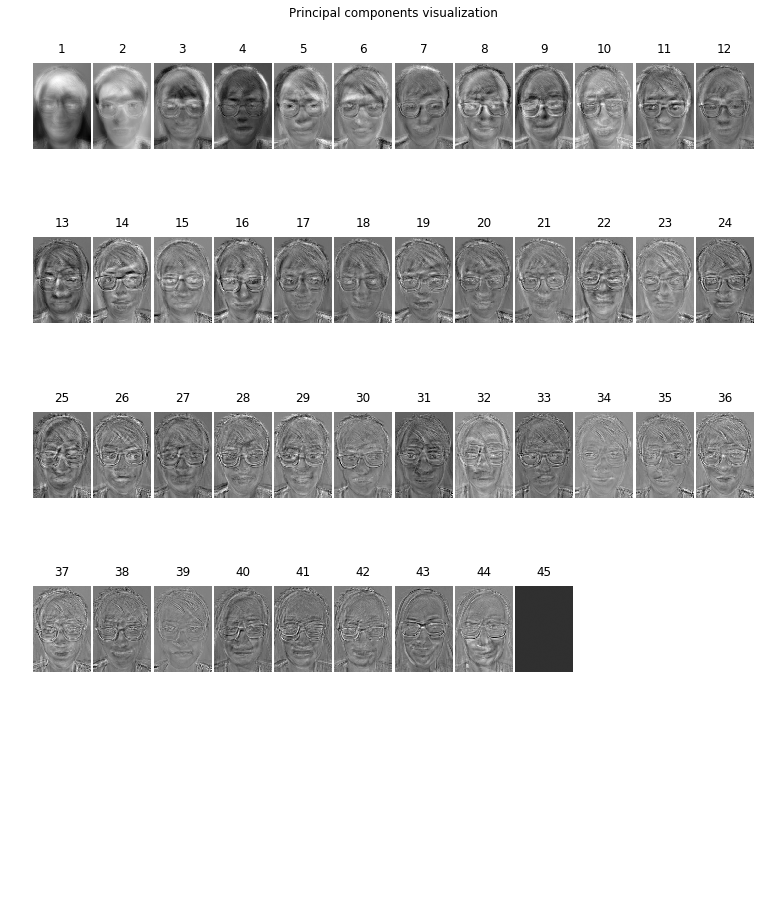

In [217]:
get_principal_components(pca.components_, pca.components_.shape[0], (450,300))

In [226]:
def prepare_data(X: np.ndarray, components: int):
    pca = PCA(n_components=components)
    pca.fit(X)
    X_transfomred = pca.transform(X)
    return pca.inverse_transform(X_transfomred)
    
def reconstruct(X: np.ndarray, components: int, photo_amount: int, photo_size: tuple):
    X_rec = prepare_data()
    fig = plt.figure(figsize=(10,12)) 
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
    plt.title(f"Reconstructed pictures from {n_components} components")
    plt.axis('off')
    for i in range(photo_amount): 
        ax = fig.add_subplot(5, photo_amount / 5, i + 1) 
        ax.axis('off')
        ax.matshow(X_rec[i].reshape(photo_size), cmap='gray', interpolation='nearest') 
    plt.show()

#### Reconstruction for (5, 15, 50) components

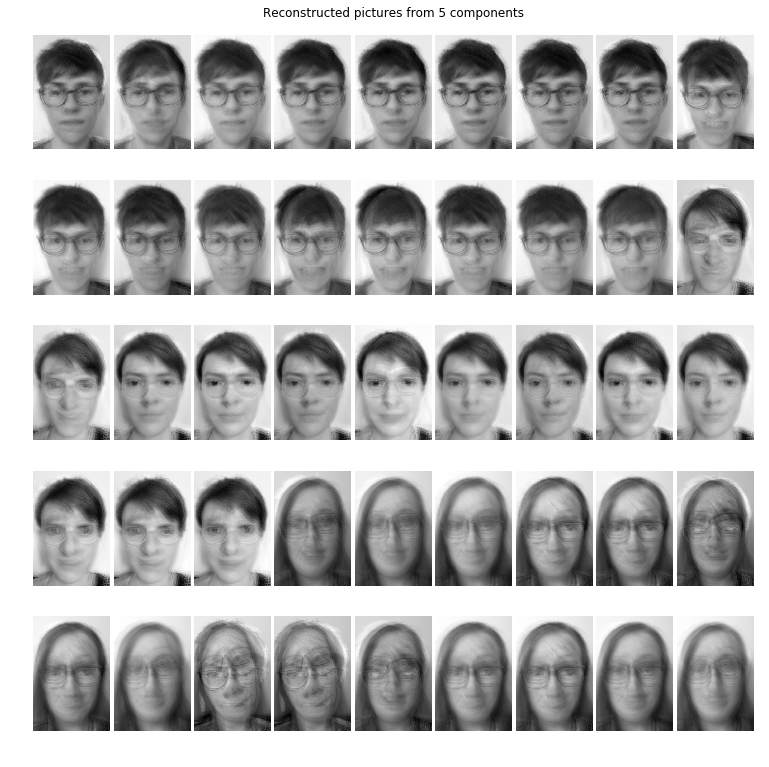

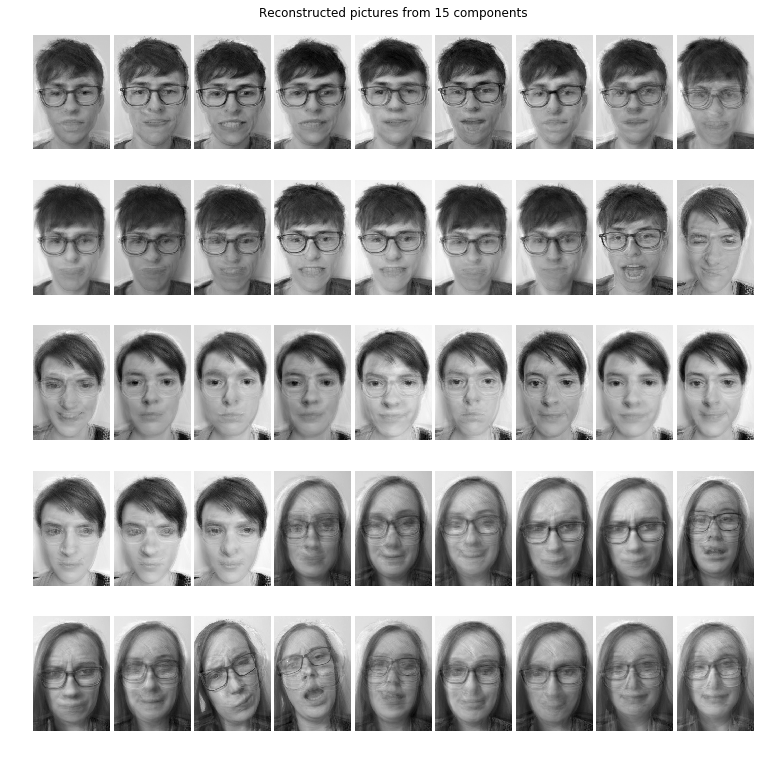

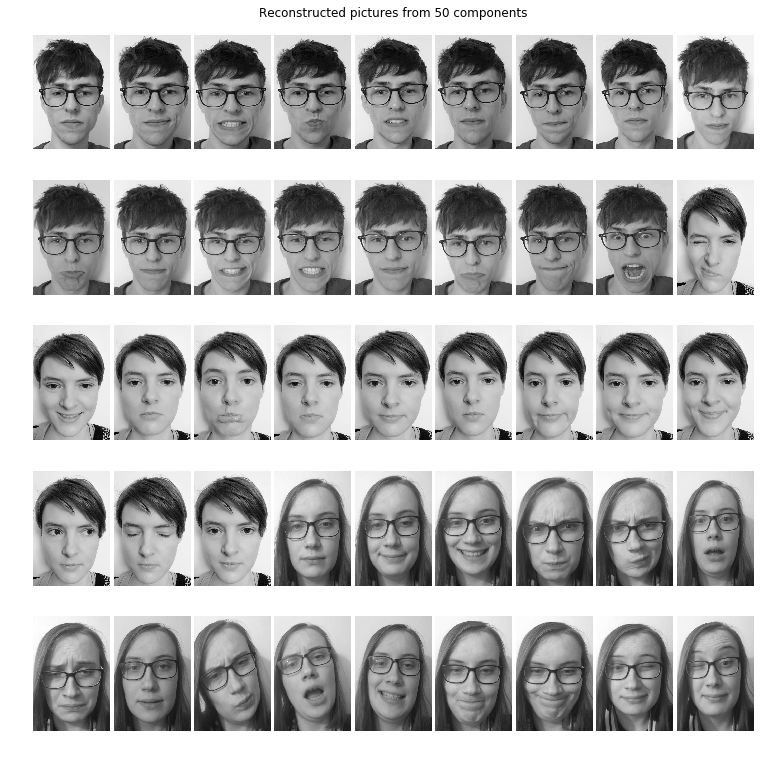

In [260]:
dims = [5,15,50]
X_r = deepcopy(X)
X_r = np.c_[X_r, np.zeros((45))]

for dim in dims:
    transform_and_reconstruct(X_r, dim)

In [228]:
cmap = ListedColormap(['#7B241C','#F1C40F','#82E0AA'])

In [249]:
def photos_on_2D(X: np.ndarray, y: np.ndarray, cmap):
    pca = PCA(n_components=2)
    pca.fit(X)
    X_transformed = pca.transform(X)
    plt.figure(figsize=(10,10))
    plt.title("Visualization photos on 2D space")
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap=cmap)

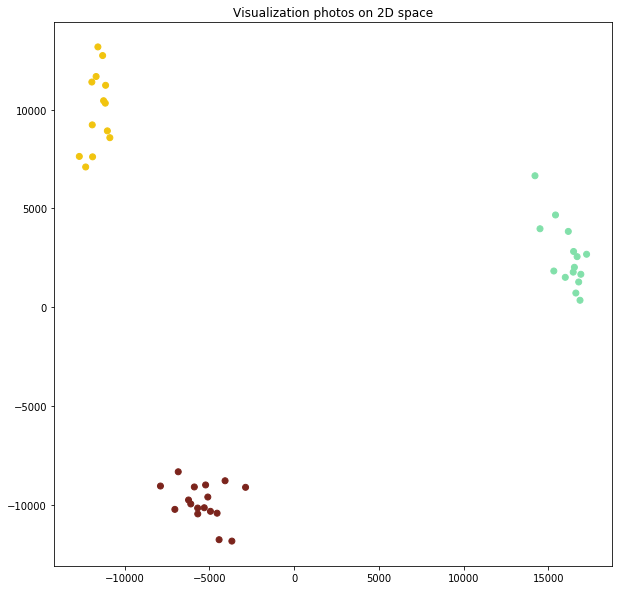

In [251]:
photos_on_2D(X, y, cmap)